# Loan Status Prediction

Import all the Independencies

In [58]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score #get predictions and accuracies of system + data set

### Data Collecting and Processing

In [59]:
loan_dataset = pd.read_csv("loan.csv")

In [60]:
loan_dataset.head() #Display the first 5 rows of the data to inspect its contents

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [61]:
#Select a range of rows using their labels
loan_dataset.loc[20:30, ['Loan_ID', 'Gender', 'Dependents']]

,Loan_ID,Gender,Dependents
20,LP001043,Male,0
21,LP001046,Male,1
22,LP001047,Male,0
23,LP001050,NaN,2
24,LP001052,Male,1
25,LP001066,Male,0
26,LP001068,Male,0
27,LP001073,Male,2
28,LP001086,Male,0
29,LP001087,Female,2


In [62]:
#Select a range of rows and/or columns using their positions in the dataset
loan_dataset.iloc[100:200, [0, 4, 5]]

,Loan_ID,Education,Self_Employed
100,LP001345,Not Graduate,No
101,LP001349,Graduate,No
102,LP001350,Graduate,No
103,LP001356,Graduate,No
104,LP001357,Graduate,No
...,...,...,...
195,LP001665,Graduate,No
196,LP001666,Graduate,No
197,LP001669,Not Graduate,No
198,LP001671,Graduate,No


In [63]:
#Check the shape (number of rows and columns) of the dataset
loan_dataset.shape # 614 rows and 13 columns

(614, 13)

In [64]:
#Describe statistical measure for numerical columns in the dataset
loan_dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [65]:
#Check for the missing values in the dataset and count them for each column
loan_dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [66]:
#Remove all the rows with missing values in the dataset
loan_dataset = loan_dataset.dropna()

In [67]:
loan_dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [68]:
#Perform label encoding to convert "Loan_Status" column values (N,Y) to (0,1)
loan_dataset.replace({"Loan_Status": {"N":0, "Y":1}}, inplace = True)

In [69]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [70]:
#Counting values in the "Dependents" column to identify the unique values
loan_dataset["Dependents"].value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [71]:
loan_dataset = loan_dataset.replace('3+', 4)

In [72]:
loan_dataset["Dependents"].value_counts()

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

In [73]:
#loan_dataset = loan_dataset.replace('1', 4)
#loan_dataset["Dependents"].value_counts()

In [74]:
#loan_dataset = loan_dataset.replace('0', '2')
#loan_dataset["Dependents"].value_counts()

### Data Visualization

In [75]:
sns.set_palette("tab10") # set the color palette for Seaborn

In [76]:
# Create a countplot to visualize the relationship between 'Education' and 'Loan_Status'
# Count the observation in each categorrical bin using bar plots

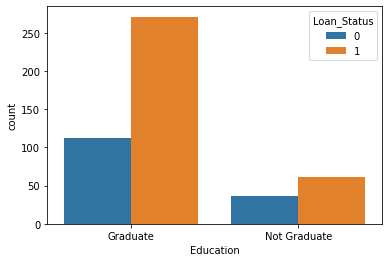

In [77]:
sns.countplot(x = 'Education', hue = 'Loan_Status', data = loan_dataset)
plt.show()

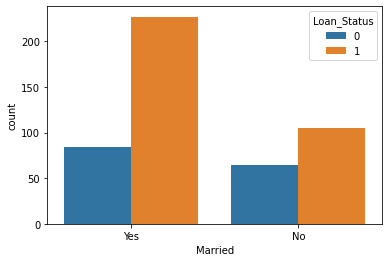

In [78]:
sns.countplot(x = 'Married', hue = 'Loan_Status', data = loan_dataset)
plt.show()

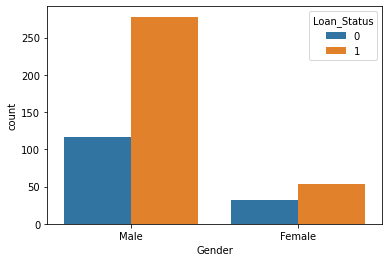

In [79]:
sns.countplot(x = 'Gender', hue = 'Loan_Status', data = loan_dataset)
plt.show()

### Feature Engineering

In [80]:
# Convert categorical columns to numerical values

In [81]:
loan_dataset.replace({"Married": {"No": 0, "Yes": 1},
                      "Gender": {"Female": 0, "Male": 1},
                      "Self_Employed": {"No": 0, "Yes": 1},
                      "Education": {"Not Graduate": 0, "Graduate": 1},
                      "Dependents": {"0": 0, "1": 1},
                      "Property_Area": {"Rural": 0, "Semiurban": 1, "Urban": 2}
                     }, inplace = True)

In [82]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


In [83]:
# Data and Label Separation

In [84]:
# Extract the feature Matrix (x) and the target Labels (y)

In [85]:
x = loan_dataset.drop(columns = ["Loan_ID", "Loan_Status"], axis = 1).values #add all the values of Loan_ID and Loan_Status

In [86]:
y = loan_dataset["Loan_Status"].values #gets the loan status for each individuall --> the values we need to make the loan status prediction ML

In [87]:
print(x)

[[1 1 1 ... 360.0 1.0 0]
 [1 1 0 ... 360.0 1.0 2]
 [1 1 0 ... 360.0 1.0 2]
 ...
 [1 1 1 ... 360.0 1.0 2]
 [1 1 '2' ... 360.0 1.0 2]
 [0 0 0 ... 360.0 0.0 1]]


In [88]:
print(y)

[0 1 1 1 1 1 0 1 0 1 1 0 1 1 0 0 0 1 0 1 1 1 0 0 0 1 0 1 1 1 0 1 1 1 1 0 1
 1 1 0 0 0 1 1 0 1 1 1 1 0 0 0 0 1 1 0 1 1 1 1 0 0 0 0 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 0 1 0 0 0 1 1 1 1 1
 1 1 0 1 0 1 0 0 1 1 1 1 1 0 0 1 1 0 1 0 1 0 1 0 1 1 0 1 0 0 1 0 1 1 0 1 1
 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1
 1 0 1 1 1 0 1 1 1 1 0 0 1 1 0 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 0 0 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 0 1 1 0 1
 1 1 1 1 0 0 1 1 1 1 1 1 0 1 0 1 1 0 0 1 0 1 1 1 0 0 1 0 1 1 1 0 1 1 0 1 1
 1 1 0 1 1 1 1 1 1 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 0 1 0 1 0 0 1 1 1 1 1 1
 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 0 1 0 1 1 0 1 0 0 1 0 1 1
 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 0 1 1 0 0 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 0 1 0 1 1 0 0 1 1 1 1 1 1 1 1 0 1 0
 0 0 1 1 0 0 1 1 1 1 0 1 0 0 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0]


### Spliting Training and Test Data

In [89]:
# Split the data into training and test sets using train_test_split

In [90]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.1, stratify = y, random_state = 2) 

In [91]:
# Print the shapes of the training andd test sets

In [92]:
print("Total Data: ", x.shape)

Total Data:  (480, 11)


In [93]:
print("Train Data: ", x_train.shape)

Train Data:  (432, 11)


In [94]:
print("Test data: ", x_test.shape)

Test data:  (48, 11)


In [95]:
print(x_train)

[[0 0 0 ... 360.0 0.0 1]
 [1 1 1 ... 360.0 1.0 1]
 [1 1 '2' ... 180.0 1.0 2]
 ...
 [1 0 0 ... 360.0 1.0 2]
 [0 0 0 ... 300.0 1.0 1]
 [1 1 4 ... 360.0 1.0 0]]


In [96]:
print(y_train)

[1 1 1 1 1 0 1 1 0 1 1 0 0 1 1 1 1 1 1 1 0 1 0 1 0 0 0 1 1 1 1 1 1 1 0 1 0
 0 1 0 1 1 0 1 0 0 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 0 0
 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 1 1 0 1 1 1 1 1 1 0 0
 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 1 1 1 1 1 0
 1 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 0 1 0 1 0 0 0 1 1 0 1 1 0 1
 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 0 0 1 0 1 0 0 1 1 0 1 1 1 1 1 0 1 0 0 0 1 1
 1 1 1 1 1 0 0 1 0 1 0 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 0 1 1 0 1 1 1 1 0 1 1
 0 1 1 0 0 1 0 1 1 0 0 1 1 1 0 1 1 0 0 0 1 1 1 0 1 1 1 0 1 1 1 1 0 1 0 0 1
 0 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 0 0 1 1 0 1 1 1 0 1 1 0 1 0 1 1 0 1 0 1 1
 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 0 0 1 0 1
 1 1 0 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 0 0 1]


### Model Training

In [97]:
# Create a support vector machine (SVM) classifier with a linear kernel

In [98]:
classifier = svm.SVC(kernel = 'linear')

In [99]:
classifier.fit(x_train, y_train)

SVC(kernel='linear')

### Model Evaluation

In [100]:
# Accuracy Score on the training data

In [101]:
x_train_prediction = classifier.predict(x_train)
training_data_accuracy = accuracy_score(x_train_prediction, y_train)
print("Accuracy on training data: ", training_data_accuracy)

Accuracy on training data:  0.7986111111111112


In [102]:
x_test_prediction = classifier.predict(x_test)
test_data_accuracy = accuracy_score(x_test_prediction, y_test)
print("Accuracy on test data: ", test_data_accuracy)

Accuracy on test data:  0.8333333333333334


# Predictive System

In [103]:
# Sample Prediction

In [104]:
y_test

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1])

In [105]:
y_test[19] #pick number that shows the specific loan status of random person

0

In [106]:
# Select one specific test example (index 19) for prediction

In [107]:
x_new = x_test[19]

In [108]:
x_new = x_new.reshape(1,-1)

In [109]:
# Make a prediction for the selected example

In [110]:
prediction = classifier.predict(x_new)

In [111]:
print("Prediction: ", prediction)

Prediction:  [0]


In [112]:
# Check if the predicted result is 0 (not approved) or 1 (approved)

In [113]:
if prediction[0] == 0:
    print("Your loan is not approved.")
else:
    print("Your loan is approved.")

Your loan is not approved.
